This is a brief investigation into data from the Coffee Quality Institute between 2017 and 2023. What follows is some data cleaning, a few
visualizations, and some insights gleamed from the data.

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from matplotlib import colormaps
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

From the outset, we can see that there is both numeric and non-numeric data to deal with, some of which needs to be converted to numeric
data to be useful for analysis (Bag Weight and Harvest Year, specifically). There are also a few columns that have only one observation in 
them (Status, Clean Cup, and Sweetness, along with a few others), or only a few observations (like Uniformity, Category One Defects, or 
Harvest Year). These columns are also less helpful for the analysis that follows, and are largely ignored (save for the Harvest Year 
category). Finally, the ICQ Number column only has 75 non-null values, unlike the 207 non-null values from the rest of the table. this column is ignored completely in this analysis.

In [2]:
df = pd.read_csv('/Users/cmiller3rd/Documents/Coding_Temple/Capstone_II/df_arabica_clean.csv')
# df.head(10)
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

Unnamed: 0               207
ID                       207
Country of Origin         22
Farm Name                172
Lot Number               187
Mill                     162
ICO Number                67
Company                   72
Altitude                  97
Region                   120
Producer                 172
Number of Bags            55
Bag Weight                39
In-Country Partner        21
Harvest Year               7
Grading Date              75
Owner                     80
Variety                   48
Status                     1
Processing Method         10
Aroma                     19
Flavor                    19
Aftertaste                20
Acidity                   19
Body                      17
Balance                   18
Uniformity                 3
Clean Cup                  1
Sweetness                  1
Overall                   21
Defects                    1
Total Cup Points          81
Moisture Percentage       46
Category One Defects       6
Quakers       

The first true inquiry into the data involved a composite look at the numeric factors making up the "Total Cup Points" column, which is the primary focus of the analysis here. The most striking insight is in how little variation there is between all the coffees listed. The range of Total Cup Points goes from 78 to 89.3, suggesting that all of the coffees evaluated here are well above average. It also suggests that small variations in the Total Cup Points score can have major effects on the overall experience of the coffee.

In [3]:

df_score = df[['Variety', 'Country of Origin', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
               'Overall', 'Total Cup Points', 'Moisture Percentage', 'Category One Defects', 'Quakers',
               'Category Two Defects', 'Color']]
df_score.describe()
# df_score.sort_values('Total Cup Points', ascending=False).head(20)

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,7.676812,83.706570,10.735266,0.135266,0.690821,2.251208
std,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.306359,1.730417,1.247468,0.592070,1.686918,2.950183
min,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,6.670000,78.000000,0.000000,0.000000,0.000000,0.000000
25%,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,7.500000,82.580000,10.100000,0.000000,0.000000,0.000000
50%,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,7.670000,83.750000,10.800000,0.000000,0.000000,1.000000
75%,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,7.920000,84.830000,11.500000,0.000000,1.000000,3.000000
max,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,8.580000,89.330000,13.500000,5.000000,12.000000,16.000000


The next few inquiries explore various aspects of the coffees listed, starting with the country of origin. This first chart shows the number 
of entries grouped by the country the coffee came from. There is the most variety from Taiwan, and the least variety from Madagascar. The 
primary insight to take from this is that some countries (for reasons that go beyond the scope of this analysis) are sourced far more
frequently for their coffee than others.

Following that, there is a brief inquiry into why there are more Regions in Colombia than Farm Names (turns out there is one region with no farm named at all) and some more data cleaning (explained in more detail below). Once the data have been cleaned, the next several inquiries focus on where the most coffee and the best coffee is sourced from (more explanation below).

In [4]:

countries = df[['Country of Origin', 'Farm Name', 'Region']].groupby('Country of Origin', as_index=False).count().sort_values('Region', ascending=False)
countries

,Country of Origin,Farm Name,Region
16,Taiwan,61,61
5,Guatemala,21,21
1,Colombia,17,18
6,Honduras,13,13
18,Thailand,12,12
4,Ethiopia,11,11
0,Brazil,10,10
2,Costa Rica,8,8
3,El Salvador,7,7
13,Nicaragua,7,6


In [148]:
# Colombia has one entry where there is a region but no farm listed. This is exploring that data

colombia_data = df[df['Country of Origin'] == 'Colombia']
colombia_regions = colombia_data[['Farm Name', 'Region']].groupby('Region').count().sort_values('Farm Name', ascending=False)
colombia_regions

colombia_farms = colombia_data[['Farm Name', 'Region']].groupby('Farm Name').count().sort_values('Region', ascending=False)
colombia_farms

pereira_info = df[df['Region'] == 'Pereira']
pereira_info

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Bag Weight (Int),Total Coffee (kg),Altitude (Int),Harvest Year (Int)
97,97,97,Colombia,NaN,3/37/1370,"Racafé & CIA S.C.A, Km 5 Vía Pereira",3/37/1370,Marubeni Corporation,1411,Pereira,...,green,1,"April 16th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,70,26250,1411.0,2022.5


Here, more of the data cleaning starts. The Bag Weight column is changed to an integer (for easier manipulation and comparison), and the anomaly of Ethiopia's bag weight entries is converted to a more feasible number. For future inquiries and better data analysis, I would like to confirm the data from the original dataset.

In [6]:
# change Bag Weight to Numeric data rather than Object
def toNumber(obj):
    return int(obj.split()[0])

df['Bag Weight (Int)'] = df['Bag Weight'].apply(toNumber)

# get total coffee by entry (multiply # of bags by bag weight)
df['Total Coffee (kg)'] = df['Bag Weight (Int)'] * df['Number of Bags']
total_coffee = df[['Total Coffee (kg)', 'Country of Origin', 'Number of Bags', 'Bag Weight (Int)']].groupby('Country of Origin').sum('Total Coffee (kg)').sort_values('Bag Weight (Int)', ascending=False)

In [7]:
# check Ethiopia entries for bag weight anomaly
ethiopia_df = df[df['Country of Origin'] == 'Ethiopia']
ethiopia_df.sort_values('Bag Weight (Int)', ascending=False)

df[df['Mill'] == 'GUJI COFFEE EXPORT P.L.C']
df[df['Farm Name'] == 'YHAENU PLC FARM']
df[df['Region'] == 'OROMIA']

# Since there are only two entries with that (probably) incorrect bag weight (19200), I will change the value by removing the potentially extra 0s
df.loc[35, 'Bag Weight (Int)'] = 192
df.loc[116, 'Bag Weight (Int)'] = 192

# df[df['Country of Origin'] == 'Ethiopia']
df['Total Coffee (kg)'] = df['Bag Weight (Int)'] * df['Number of Bags']
df[['Total Coffee (kg)', 'Country of Origin', 'Number of Bags', 'Bag Weight (Int)']].sort_values('Total Coffee (kg)', ascending=False)



,Total Coffee (kg),Country of Origin,Number of Bags,Bag Weight (Int)
202,134400,Brazil,2240,60
116,61440,Ethiopia,320,192
35,61440,Ethiopia,320,192
129,57600,Brazil,960,60
206,36000,Brazil,600,60
...,...,...,...,...
22,2,Thailand,2,1
190,2,Thailand,2,1
150,2,Thailand,2,1
105,1,Colombia,1,1


In [8]:
# change Altitude column to integers, using averages for ranges
def altToInt(entry):
    if pd.notna(entry):
        range = [int(x) for x in re.split(r'-|A|~', entry)]
        if range:
            return np.mean(range)
        else:
            return int(entry)

df['Altitude (Int)'] = df['Altitude'].apply(altToInt)

In [9]:
most_coffee = df[['Country of Origin', 'Total Coffee (kg)', 'Number of Bags', 'Bag Weight (Int)']].groupby(['Country of Origin']).sum('Total Coffee (kg)')
most_coffee.sort_values('Total Coffee (kg)', ascending=False)

,Total Coffee (kg),Number of Bags,Bag Weight (Int)
Country of Origin,,,
Brazil,320325,5669,490
Guatemala,245370,6432,786
Ethiopia,224740,2642,809
Honduras,170490,2884,672
Colombia,161512,3064,680
"Tanzania, United Republic Of",94200,1980,300
Nicaragua,93630,1594,396
Costa Rica,71014,1442,346
Peru,56940,828,212


Here, we begin to investigate where the best coffee originates, using Country, Altitude, Farm Name, Region, and Variety as variables
to investigate.
Best Country: Ethiopia
Altitude: No correlation between altitude and coffee quality
Best Variety: Castillo
Best Farm: Finca El Paraiso
Best Region: Piendamo, Cauca


In [10]:

best_total = df_score.groupby(['Country of Origin']).mean('Total Cup Points').sort_values('Total Cup Points', ascending=False).head(10)
best_total['Total Cup Points']

Country of Origin
Ethiopia                        84.960909
Tanzania, United Republic Of    84.735000
Taiwan                          84.350328
Guatemala                       84.301429
Madagascar                      84.250000
Uganda                          83.916667
Colombia                        83.877368
Costa Rica                      83.740000
Kenya                           83.710000
Indonesia                       83.693333
Name: Total Cup Points, dtype: float64

In [11]:
correlate = df[['Total Cup Points', 'Altitude (Int)']].corr()
correlate
# apparently the altitude does not correlate with the Total Cup Points

,Total Cup Points,Altitude (Int)
Total Cup Points,1.000000,0.120916
Altitude (Int),0.120916,1.000000


In [12]:
varieties = df[['Variety', 'Total Cup Points']].groupby('Variety').mean('Total Cup Points').sort_values('Total Cup Points', ascending=False).head(10)
varieties

,Total Cup Points
Variety,
Castillo,89.330000
Red Bourbon,87.080000
Sl34+Gesha,86.750000
"Wolishalo,Kurume,Dega",86.080000
Castillo Paraguaycito,85.670000
Gesha,85.425926
SL34,84.936250
Yellow Bourbon,84.776667
Ethiopian Heirlooms,84.702222


The primary problem with the Variety column is that there is no standard format for the entries. Many entries include multiple variety names, thus muddying the analysis. In order to achieve a clearer picture of the variety, there needs to be a clearer distinction when listing varieties in each entry (perhaps just one variety per entry).

In [149]:

most_variety = df[['Variety', 'Total Coffee (kg)', 'Country of Origin']].groupby('Variety', as_index=False).sum('Total Coffee (kg)').sort_values('Total Coffee (kg)', ascending=False)
most_variety.head(10)

,Variety,Total Coffee (kg)
14,Caturra,375781
25,Mundo Novo,246600
17,Ethiopian Heirlooms,222300
1,Bourbon,199288
11,Catuai,176860
32,SL14,47400
31,SHG,45915
8,Catimor,43867
37,Sarchimor,36975
12,Catuai and Mundo Novo,26400


In [14]:

best_farm = df[['Farm Name', 'Total Cup Points']].groupby('Farm Name', as_index=False).mean('Total Cup Points').sort_values('Total Cup Points', ascending=False).head(10)
best_farm


,Farm Name,Total Cup Points
38,Finca El Paraiso,89.33
93,Royal Bean Geisha Estate,87.58
87,OKLAO coffee farms,87.42
44,Finca Santuario,87.08
66,La Colina,87.00
162,野牡丹咖啡莊園 Melastoma Coffee Estate,86.92
117,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,86.75
118,亮軒咖啡莊園 Liang Xuan Coffee Farm,86.67
61,Karen Acajabon Coffee Farm,86.25
127,古峰咖啡莊園 Goodfun Coffee Farm,86.25


In [15]:

best_region = df[['Region', 'Total Cup Points']].groupby('Region', as_index=False).mean('Total Cup Points').sort_values('Total Cup Points', ascending=False).head(10)
best_region


,Region,Total Cup Points
76,"Piendamo,Cauca",89.330
52,Laos Borofen Plateau,87.420
77,"Popayan,Cauca",87.080
27,Chimaltenango,87.000
3,Acatenango,86.250
37,Guji,86.210
108,tolima,86.170
35,"Gedeb,Yirgacheffe,Sidamo",86.080
38,"Gukeng Township, Yunlin County",85.920
55,"Los Santos,Tarrazu",85.835


In the inquiry below, we can see that, while the best coffee on average is from Ethiopia, in fact the best overall coffee is from Colombia, and 4 of the top 10 coffees are from Taiwan. We can use this to decide on where to source some speciality coffees from versus finding a large-volume source of consistently high-quality coffee.

In [153]:
region_variety = df[['Region', 'Variety', 'Total Cup Points']].sort_values('Total Cup Points', ascending=False)
region_variety
best_cup = region_variety[region_variety['Total Cup Points'] >= 85]
best_cup.groupby(['Region', 'Variety']).mean('Total Cup Points').sort_values('Total Cup Points', ascending=False)
region_country = df[['Region', 'Variety', 'Country of Origin', 'Total Cup Points']].sort_values('Total Cup Points', ascending=False)
region_country.head(10)

,Region,Variety,Country of Origin,Total Cup Points
0,"Piendamo,Cauca",Castillo,Colombia,89.33
1,Chiayi,Gesha,Taiwan,87.58
2,Laos Borofen Plateau,Java,Laos,87.42
3,"Los Santos,Tarrazu",Gesha,Costa Rica,87.17
4,"Popayan,Cauca",Red Bourbon,Colombia,87.08
5,Chimaltenango,Gesha,Guatemala,87.00
6,Chiayi,Gesha,Taiwan,86.92
7,Chiayi,Sl34+Gesha,Taiwan,86.75
8,Chiayi,SL34,Taiwan,86.67
9,KILIMANJARO,Bourbon,"Tanzania, United Republic Of",86.50


I next converted the Harvest Year column to numeric, instead of object. However, since many of the harvest years are listed as a range of years (2021-2022, e.g.), I converted the years to an average of the two years listed (using Regex to split the years into two groups of digits split by the '/' character.

In [154]:
def yearToInt(entry):
    if pd.notna(entry):
        range = [int(x) for x in re.split(r'/', entry)]
        if range:
            return np.mean(range)
        else:
            return int(entry)
df['Harvest Year (Int)'] = df['Harvest Year'].apply(yearToInt)
best_year = df[['Total Cup Points', 'Harvest Year (Int)']].sort_values('Harvest Year (Int)')
best_year[best_year['Total Cup Points'] >= 85].sort_values('Harvest Year (Int)', ascending=False)
best_year[best_year['Total Cup Points'] >= 85].sort_values('Total Cup Points', ascending=False).head(10)

,Total Cup Points,Harvest Year (Int)
0,89.33,2021.5
1,87.58,2021.5
2,87.42,2021.5
3,87.17,2022.0
4,87.08,2022.0
5,87.00,2022.0
6,86.92,2021.5
7,86.75,2021.5
8,86.67,2021.5
9,86.50,2022.5


Looking at processing method, I found the same difficulty as with Varieties. There is not a standard format for entries in this column, and many columns list multiple processing methods. This makes analyzing the best processing method difficult, as we can see from the list of the top ten Total Cup Points entries grouped by processing method below. Again, I recommend a more standardized list for processing methods in order to more consistently analyze them for quality.

In [18]:

processing = df[['Total Cup Points', 'Processing Method']].groupby('Processing Method', as_index=False).mean('Total Cup Points').sort_values('Total Cup Points', ascending=False)
processing

,Processing Method,Total Cup Points
1,Double Anaerobic Washed,89.330000
7,Semi Washed,87.420000
3,"Honey,Mossto",87.080000
2,Double Carbonic Maceration / Natural,84.750000
9,Wet Hulling,84.250000
4,Natural / Dry,83.700435
8,Washed / Wet,83.645726
5,Pulped natural / honey,83.552000
0,Anaerobico 1000h,83.250000
6,SEMI-LAVADO,78.000000


In [19]:
daw = df[df['Processing Method'] == 'Double Anaerobic Washed']
daw[['Total Cup Points', 'Country of Origin', 'Farm Name', 'Region', 'Variety']]

,Total Cup Points,Country of Origin,Farm Name,Region,Variety
0,89.33,Colombia,Finca El Paraiso,"Piendamo,Cauca",Castillo


The graphs that follow illustrate the breakdown of where the most coffee comes from, the spread of total cup points, and the top ten average cup points by region, farm, variety, and country.

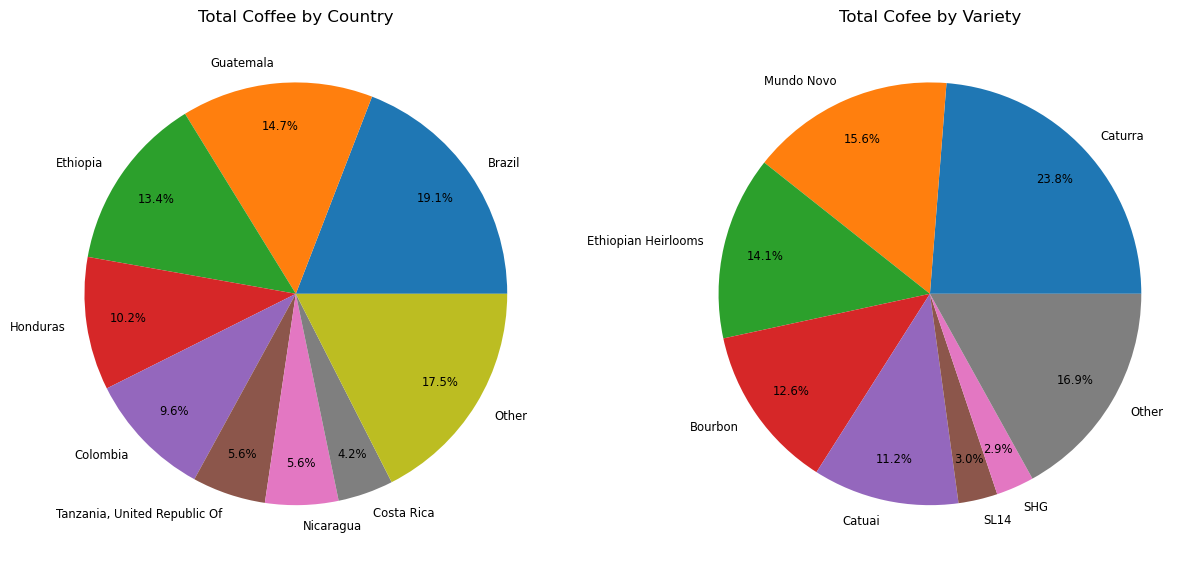

In [20]:
# country graph

country_graph = df[['Country of Origin', 'Total Coffee (kg)']].groupby('Country of Origin', as_index=False).sum().sort_values('Total Coffee (kg)', ascending=False)
small_coffee_amt = 60000
country_count = list(country_graph['Total Coffee (kg)'])
country_label = list(country_graph['Country of Origin'])

country_slice = [x for x in country_count if x >= small_coffee_amt]
small_coffee_slice = sum([x for x in country_count if x < small_coffee_amt])
country_labels = [country for country, amount in zip(country_label, country_count) if amount > small_coffee_amt]
country_labels.append('Other')

variety_graph = df[['Variety', 'Total Coffee (kg)']].groupby('Variety', as_index=False).sum().sort_values('Total Coffee (kg)', ascending=False)
small_variety_amt = 45000
variety_count = list(variety_graph['Total Coffee (kg)'])
variety_label = list(variety_graph['Variety'])

variety_slice = [x for x in variety_count if x >= small_variety_amt]
small_variety_slice = sum([x for x in variety_count if x < small_variety_amt])
variety_labels = [variety for variety, amount in zip(variety_label, variety_count) if amount > small_variety_amt]
variety_labels.append('Other')


fig, axs = plt.subplots(1,2, figsize=(15,15))
axs[0].pie(country_slice + [small_coffee_slice], labels=country_labels, autopct='%1.1f%%',
      pctdistance=.8, textprops={'size':'small'}, radius=1)
axs[0].set_title("Total Coffee by Country")
axs[1].pie(variety_slice + [small_variety_slice], labels=variety_labels, autopct='%1.1f%%',
       pctdistance=.8, textprops={'size':'small'}, radius=1)
axs[1].set_title("Total Cofee by Variety")
plt.show()

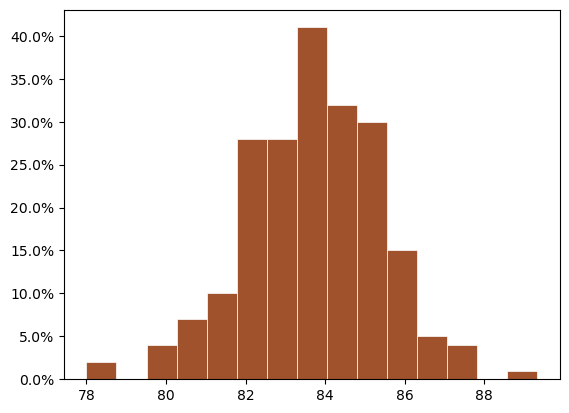

In [146]:
# Histogram for Cup Point Spread

fig, ax = plt.subplots()
ax.hist(df['Total Cup Points'], bins='auto', linewidth=0.5, edgecolor='white', color='sienna')
ax.yaxis.set_major_formatter(PercentFormatter())
plt.show()

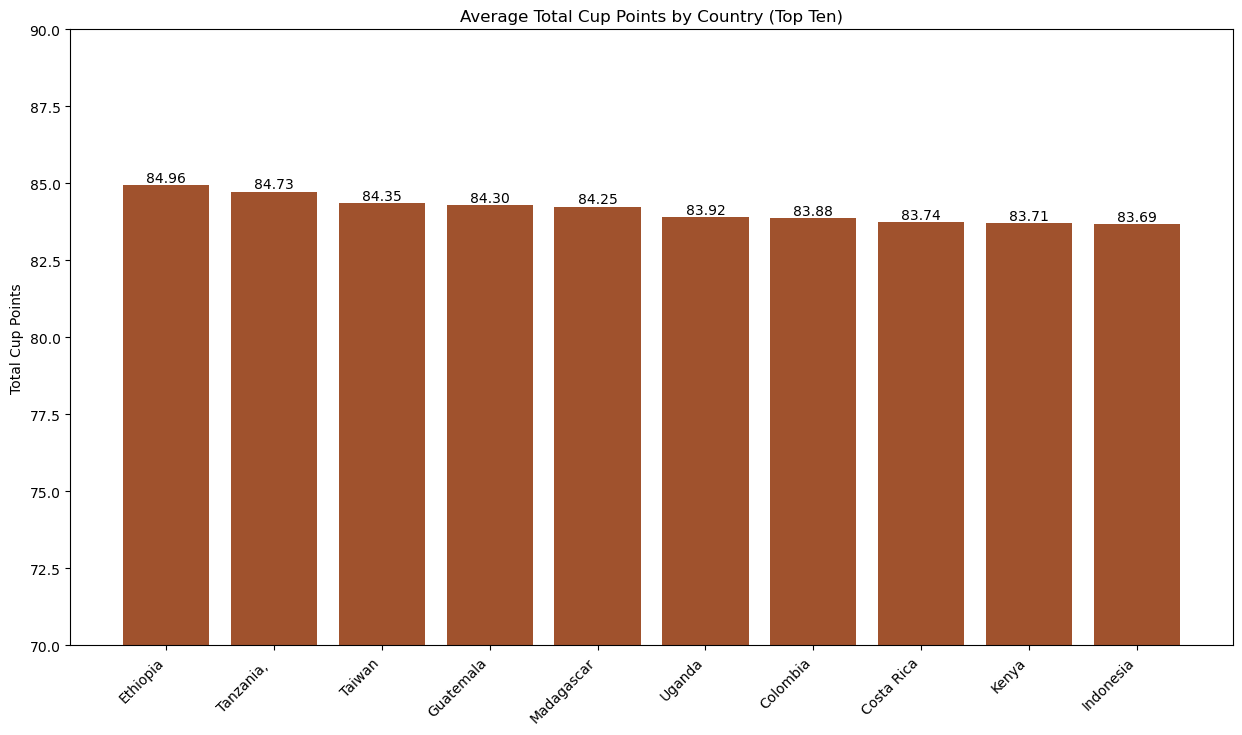

In [120]:
# Bar graph for best country
# best_total['Total Cup Points']

short_country = [country[:10] for country in best_total.index]
fig, ax = plt.subplots(figsize=(15,8))
bar_container = ax.bar(best_total.index, best_total['Total Cup Points'], color='sienna')
norm = plt.Normalize(min(best_total['Total Cup Points']), max(best_total['Total Cup Points']))
ax.set(ylabel='Total Cup Points', title='Average Total Cup Points by Country (Top Ten)', ylim=(70,90))
ax.set_xticks(best_total.index)
ax.set_xticklabels(short_country, rotation=45, ha='right')
ax.bar_label(bar_container, fmt='%.2f')
plt.show()

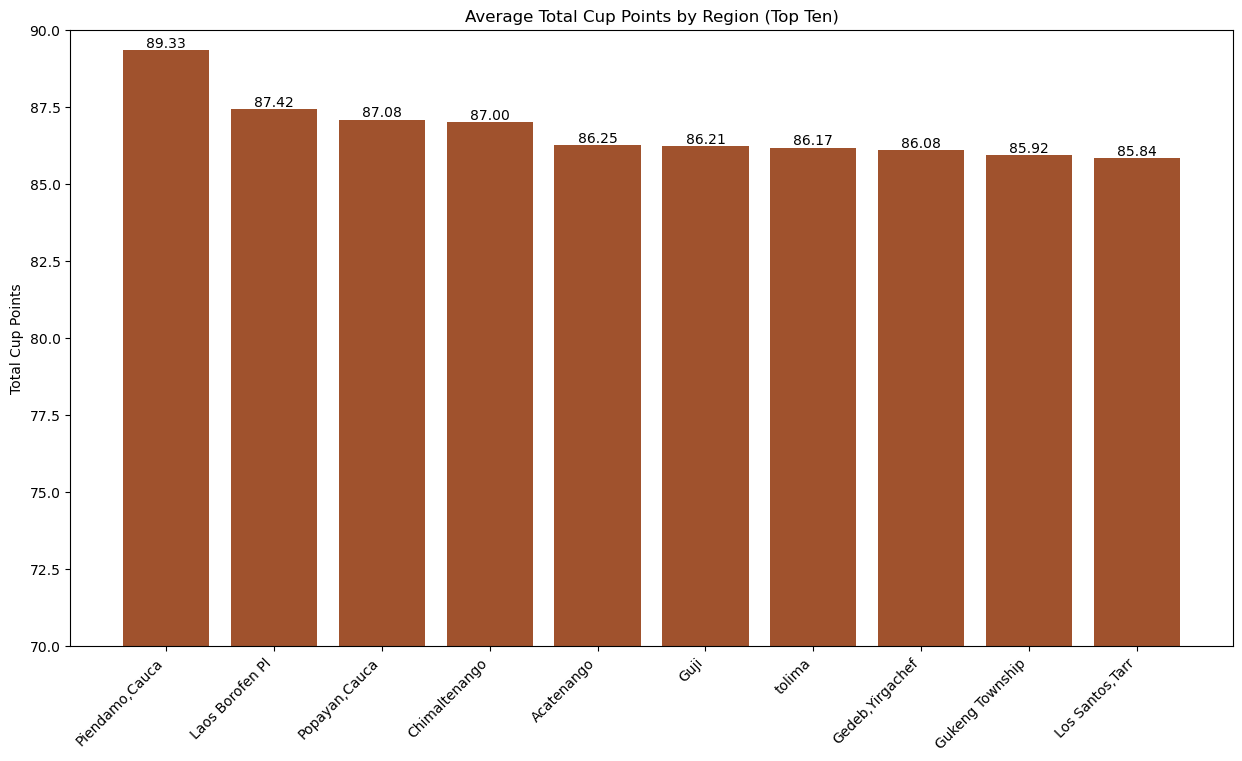

In [121]:
# Bar Graph for best region
# best_region
short_names = [name[:15] for name in best_region['Region']]
fig, ax = plt.subplots(figsize=(15, 8))
bar_container = ax.bar(best_region['Region'], best_region['Total Cup Points'], color='sienna')
ax.set(ylabel='Total Cup Points', title='Average Total Cup Points by Region (Top Ten)', ylim=(70,90))
ax.set_xticks(best_region['Region'])
ax.set_xticklabels(short_names, rotation=45, ha='right')
ax.bar_label(bar_container, fmt='%.2f')
plt.show()

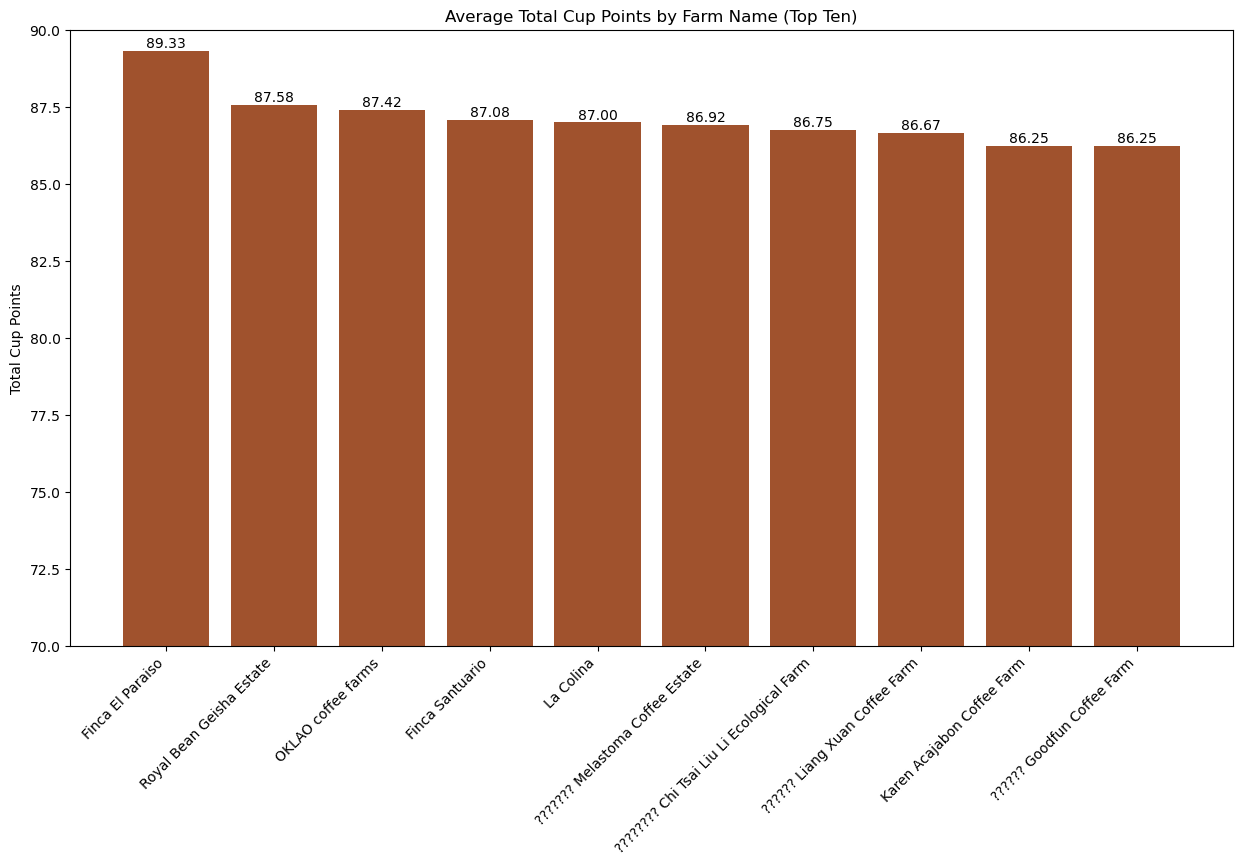

In [122]:
# Bar gaph for best farm
# best_farm

short_names = [name[:15] for name in best_farm['Farm Name']]
character_replace = [label.encode('ascii', errors='replace').decode() for label in best_farm['Farm Name']]
fig, ax = plt.subplots(figsize=(15, 8))
bar_container = ax.bar(character_replace, best_farm['Total Cup Points'], color='sienna')
ax.set(ylabel='Total Cup Points', title='Average Total Cup Points by Farm Name (Top Ten)', ylim=(70,90))
ax.set_xticks(character_replace)
ax.set_xticklabels(character_replace, rotation=45, ha='right')
ax.bar_label(bar_container, fmt='%.2f')
plt.show()

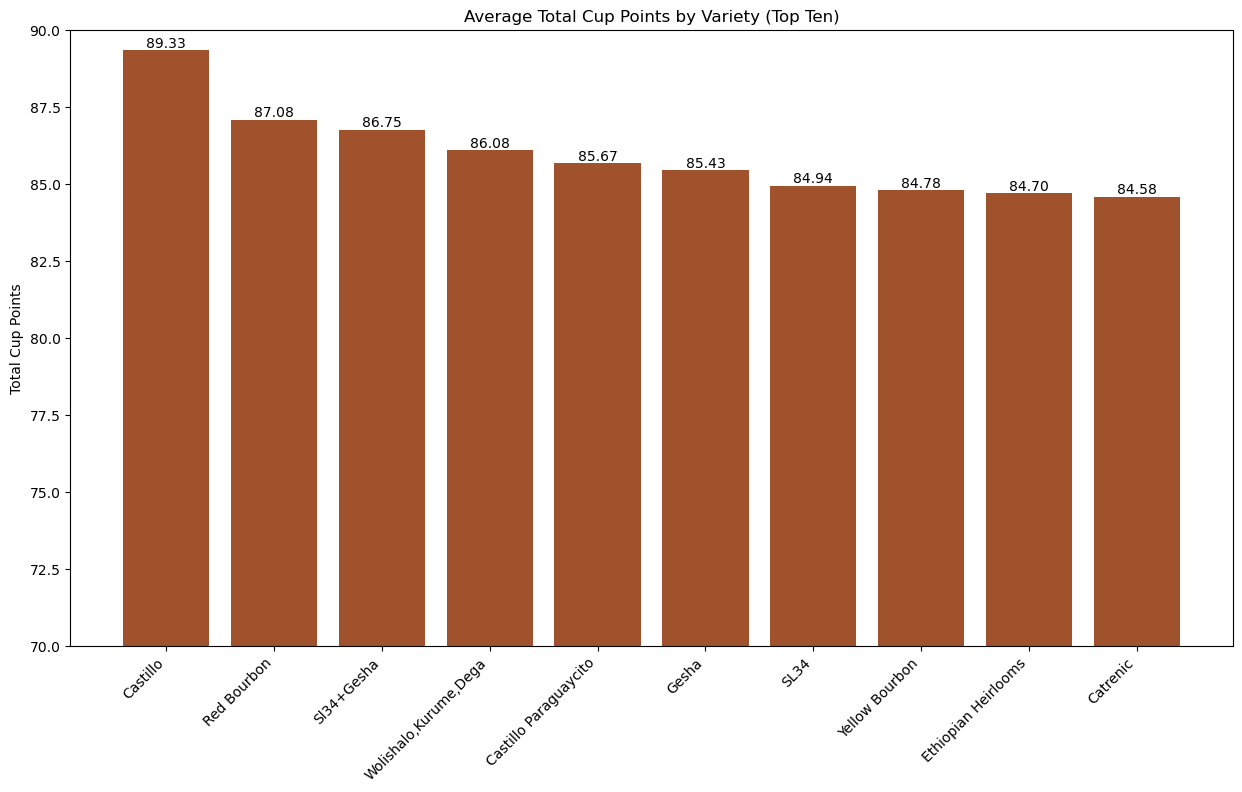

In [126]:
# Bar graph for best variety
varieties

# short_names = [name[:15] for name in varieties.index]
fig, ax = plt.subplots(figsize=(15, 8))
bar_container = ax.bar(varieties.index, varieties['Total Cup Points'], color='sienna')
ax.set(ylabel='Total Cup Points', title='Average Total Cup Points by Variety (Top Ten)', ylim=(70,90))
ax.set_xticks(varieties.index)
ax.set_xticklabels(varieties.index, rotation=45, ha='right')
ax.bar_label(bar_container, fmt='%.2f')
plt.show()

As a final analysis, the data clearly show that the best single cup of coffee is the Castillo variety from the Finca El Paraiso farm in
Colombia. Ethiopia has the best average total cup points for their coffee, and would therefore be the best source for a consistent high-
quality cup. Beyond that, most of the rest of the countries included in the dataset have a similar average total cup point score, which 
suggests that most of the coffee detailed here is high quality. As the histogram above shows, the total cup points fall into a mostly 
standard bell curve, with a couple of outliers on either side; this means that most of these coffee sources are likely to produce (on 
average) a good quality cup of coffee. While altitude does not seem to affect coffee quality (the correlation was very low), there are 
certainly other factors that affect the quality of the cup. Many of those factors are difficult to see in this dataset, given the 
inconsistency in recording data points (such as variety and processing method). 